# Une régression logistique pour prédire l'achat d'une voiture

Charger le fichier Social_Network_Ads.csv et regarder ce qu'il contient.

## Import des libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Import des données

In [2]:
df = pd.read_csv('data/Social_Network_Ads.csv').drop('User ID', axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Visualisation des données

Regardez via des graphiques de votre choix les effets des différentes variables sur l'achat d'une voiture.

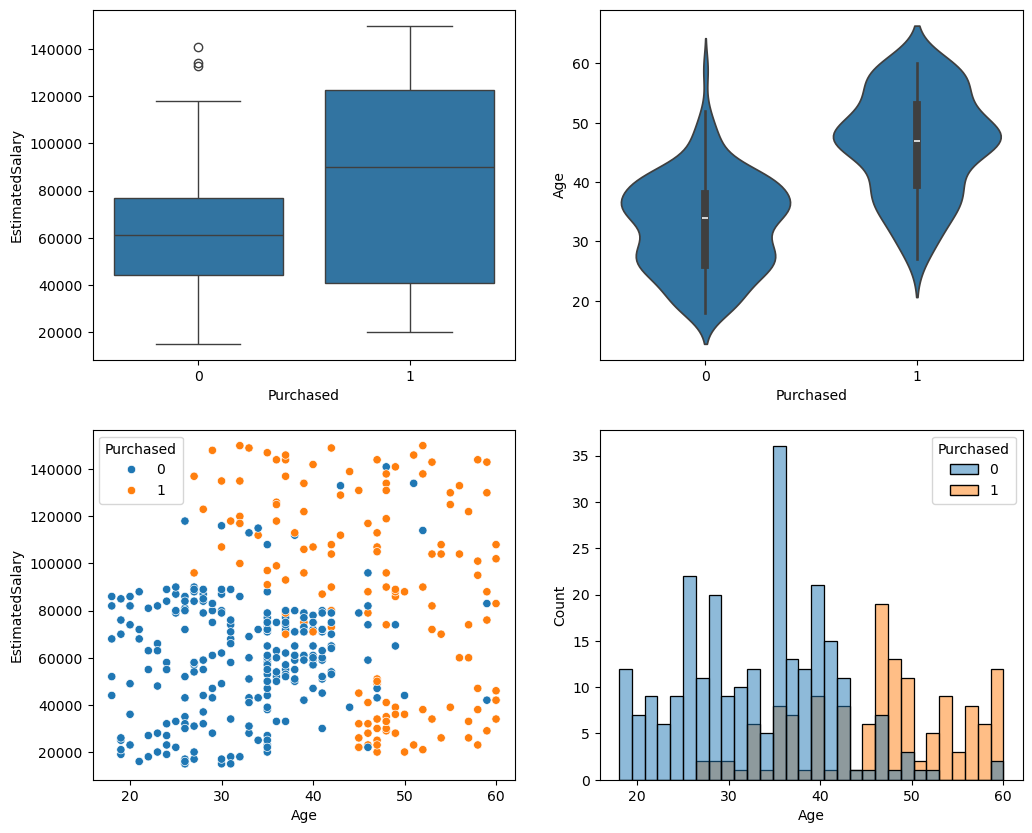

In [3]:
fig, ax = plt.subplots(2,2, figsize=(12,10))
sns.boxplot(data=df, x='Purchased', y='EstimatedSalary', ax=ax[0,0])
sns.violinplot(data=df, x='Purchased', y='Age', ax=ax[0,1])
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', ax=ax[1,0])
sns.histplot(data=df, x='Age', hue='Purchased', bins=30, ax=ax[1,1])
plt.show()

In [4]:
df.Purchased.sum()/df.shape[0]

0.3575

## Création de X et y (on ne prend que l'age et le salaire estimé dans X)

Dans un premier temps on n'utilisera dans notre modèle que Age et EstimatedSalary comme variables explicatives.

In [5]:
y = df.Purchased
X = df[['Age','EstimatedSalary']]
X.shape, y.shape

((400, 2), (400,))

## Création d'un Training set et d'un Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

## Entraînement d'une régression logistique sur le Training set

In [7]:
# instanciation et entraînement
reglog = LogisticRegression()
reglog.fit(X_train, y_train)

# prédictions
y_pred = reglog.predict(X_test)

# évaluation (matrice de confusion)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {c}' for c in reglog.classes_],
             index=[f'vrai {c}' for c in reglog.classes_])

,predit 0,predit 1
vrai 0,51,0
vrai 1,29,0


Nous avons un problème, il s'agit du *vanishing gradient*...qui vient vraisemblablement des échelles des variables. Une solution, la mise à l'échelle.

#### En divisant juste les salaires en milliers

In [8]:
X_train_1000 = X_train.copy()
X_test_1000 = X_test.copy()
X_train_1000.loc[:,'EstimatedSalary'] = X_train_1000['EstimatedSalary']/1000
X_test_1000.loc[:,'EstimatedSalary'] = X_test_1000['EstimatedSalary']/1000

# instanciation et entraînement
reglog = LogisticRegression()
reglog.fit(X_train_1000, y_train)

# prédictions
y_pred = reglog.predict(X_test_1000)

# évaluation (matrice de confusion)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {c}' for c in reglog.classes_],
             index=[f'vrai {c}' for c in reglog.classes_])

,predit 0,predit 1
vrai 0,47,4
vrai 1,5,24


#### Standardisation des features avec StandardScaler

In [9]:
# standardisation
std_sc = StandardScaler() # instanciation
X_train_std = std_sc.fit_transform(X_train)
#print(X_train_std.mean(axis=0), X_train_std.std(axis=0))
X_test_std = std_sc.transform(X_test)
#print(X_test_std.mean(axis=0), X_test_std.std(axis=0))

# instanciation et entraînement
reglog_std = LogisticRegression()
reglog_std.fit(X_train_std, y_train)

# prédictions
y_pred = reglog_std.predict(X_test_std)

# évaluation (matrice de confusion)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {c}' for c in reglog_std.classes_],
             index=[f'vrai {c}' for c in reglog_std.classes_])

,predit 0,predit 1
vrai 0,47,4
vrai 1,5,24


In [10]:
# X_train_std = std_sc.fit_transform(X_train)
# pareil que les 2 lignes ci-dessous
#std_sc.fit(X_train)
#X_train_std = std_sc.transform(X_train)

#### Normalisation des features avec MinMaxScaler

In [11]:
# normalisation
mm_sc = MinMaxScaler() # instanciation
X_train_mm = mm_sc.fit_transform(X_train)
X_test_mm = mm_sc.transform(X_test)

# instanciation et entraînement
reglog_mm = LogisticRegression(solver='liblinear')
reglog_mm.fit(X_train_mm, y_train)

# prédictions
y_pred = reglog_mm.predict(X_test_mm)

# évaluation (matrice de confusion)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {c}' for c in reglog_mm.classes_],
             index=[f'vrai {c}' for c in reglog_mm.classes_])

,predit 0,predit 1
vrai 0,47,4
vrai 1,8,21


## Visualisation des classes sur un graphique

Essayer d'obtenir le graphique suivant. C'est pas facile mais possible ! Faites 2 graphique séparés : un pour les données du training set et un pour les données du test set

<table><tr>
<td> <img src="img/viz.png"/> </td>
<td> <img src="img/viz2.png"/> </td>
</tr></table>

Vous pourrez utiliser :
- np.meshgrid
- plt.contourf
- ListedColormap
- plt.pcolormesh

/home/elka/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


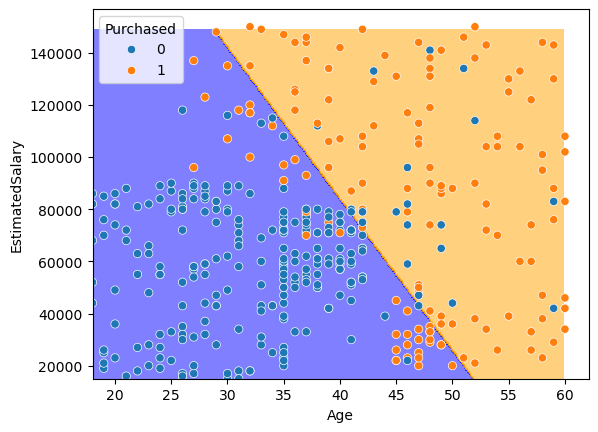

In [12]:
X1,X2 = np.meshgrid(
    np.arange(X_train.Age.min(), X_train.Age.max(), 0.1),
    np.arange(X_train.EstimatedSalary.min(), X_train.EstimatedSalary.max(), 1000)
)

XX_plot = np.concatenate((X1.reshape(-1,1), X2.reshape(-1,1)), axis=1)
Y = reglog_std.predict(std_sc.transform(XX_plot))
Y = Y.reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2,Y, cmap=ListedColormap(('blue', 'orange')), alpha=0.5)
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', ax=plt.gca());

## Un seconde régression logistique

Entraîner une nouvelle régression logistique en incluant cette fois la variable Gender

In [13]:
y = df.Purchased
X = pd.get_dummies(df[['Age','EstimatedSalary', 'Gender']], drop_first=True, dtype='int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# standardisation
std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)
X_test_std = std_sc.transform(X_test)

# instanciation et entraînement
reglog_std = LogisticRegression()
reglog_std.fit(X_train_std, y_train)

# prédictions
y_pred = reglog_std.predict(X_test_std)

# évaluation (matrice de confusion)
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {c}' for c in reglog_std.classes_],
             index=[f'vrai {c}' for c in reglog_std.classes_])

,predit 0,predit 1
vrai 0,50,1
vrai 1,8,21


## Comparaison des 2 régressions logistiques

Comparer les 2 modèles pour déterminer lequel est le "meilleur".

In [14]:
# pour déterminer quel est le meilleur modèle, il est nécessaire de les comparer sur le même découpage train/test
# il faut donc reprendre depuis le début

# train_test_split au niveau du df
df_train, df_test = train_test_split(
    pd.get_dummies(df[['Age','EstimatedSalary', 'Gender', 'Purchased']], drop_first=True, dtype='int', prefix="", prefix_sep=""),
    test_size=0.2, stratify=df.Purchased
)

# échantillons train/test
y_train, y_test = df_train.Purchased, df_test.Purchased
X_train, X_test = df_train[['Age','EstimatedSalary', 'Male']], df_test[['Age','EstimatedSalary', 'Male']]

# standardisation
std_sc = StandardScaler()
X_train_std = std_sc.fit_transform(X_train)
X_test_std = std_sc.transform(X_test)

# premier modèle avec le genre
mod1 = LogisticRegression()
mod1.fit(X_train_std, y_train)
y_pred = mod1.predict(X_test_std)
res1 = pd.DataFrame(confusion_matrix(y_test, y_pred),
                    columns=pd.MultiIndex.from_tuples(
                        [('avec genre', f'{c}') for c in mod1.classes_],
                        names=["Modèle", "prédit"]),
                    index=[f'vrai {c}' for c in mod1.classes_])

# second modèle sans le genre
mod2 = LogisticRegression()
mod2.fit(X_train_std[:,:-1], y_train)
y_pred = mod2.predict(X_test_std[:,:-1])
res2 = pd.DataFrame(confusion_matrix(y_test, y_pred),
                    columns=pd.MultiIndex.from_tuples(
                        [('sans genre', f'{c}') for c in mod2.classes_],
                        names=["Modèle", "prédit"]),
                    index=[f'vrai {c}' for c in mod2.classes_])

# comparaison des matrices de confusionfrom_tuples
pd.concat((res1,res2), axis=1)

Modèle avec genre     sans genre    
prédit          0   1          0   1
vrai 0         46   5         46   5
vrai 1         10  19         10  19

## Avec statsmodel

Pour pouvoir utiliser la même syntaxe de "formules" avec `statsmodel` après une normalisation, il faut stocker la sortie du scaler dans un dataframe. On peut faire ça à la main ou bien utiliser `set_output` comme montré ci-dessous.

In [15]:
df = pd.read_csv('data/Social_Network_Ads.csv').drop('User ID', axis=1)

# train_test_split au niveau du df en faisant les dummies direct
df_train, df_test = train_test_split(
    pd.get_dummies(df, drop_first=True, dtype='int', prefix="", prefix_sep=""),
    test_size=0.2#, stratify=df.Purchased
)

# standardisation
std_sc = StandardScaler().set_output(transform='pandas')
X_train_std = std_sc.fit_transform(df_train.drop('Purchased', axis=1))
X_test_std = std_sc.transform(df_test.drop('Purchased', axis=1))
X_train_std.loc[:,'Purchased'] = df_train.Purchased
X_test_std.loc[:,'Purchased'] = df_test.Purchased

In [16]:
import statsmodels.formula.api as smf

model = smf.logit('Purchased ~ Age + EstimatedSalary + Male', X_train_std).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.349505
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Thu, 09 Nov 2023   Pseudo R-squ.:                  0.4691
Time:                        11:29:47   Log-Likelihood:                -111.84
converged:                       True   LL-Null:                       -210.65
Covariance Type:            nonrobust   LLR p-value:                 1.378e-42
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.0823      0.189     -5.721      0.000      -1.453      -0.712
Age                 2.5086      0.309      8.111      0.000       1.902       3.115
EstimatedSalary     1.1756      0.202      5.819      0.000       0.780       1.571
Male                0.1106      0.168      0.659      0.510      -0.218       0.440
===================================================================================
"""

In [17]:
# prédictions des probabilités
prob_pred = model.predict(X_test_std)
prob_pred

316    0.979397
274    0.876481
13     0.015708
217    0.454990
196    0.057976
         ...   
229    0.537258
206    0.993169
361    0.779228
137    0.164768
373    0.997911
Length: 80, dtype: float64

In [18]:
# prédictions des classes
y_pred = prob_pred.apply(round) # round fonction si on choisit un seuil de 0.5, sinon il faut faire un if else
y_pred

316    1
274    1
13     0
217    0
196    0
      ..
229    1
206    1
361    1
137    0
373    1
Length: 80, dtype: int64

In [19]:
# évaluation
confusion_matrix(y_pred, df_test.Purchased)

array([[52,  6],
       [ 3, 19]])